# TUTORIAL ESN-421
Name: Prahlada V Mittal
Enr: 20411023 
Batch: GPT-T4 


Problem #1

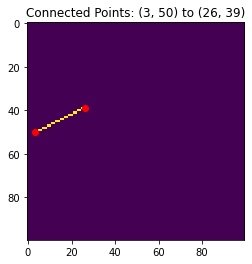

Resulting Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def create_mesh_grid(rows, cols):
    return np.zeros((rows, cols), dtype=int)

def connect_points(matrix, point1, point2):
    x1, y1 = point1
    x2, y2 = point2

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy

    while (x1, y1) != (x2, y2):
        matrix[y1, x1] = 1  # indexing the points on the line
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy

    matrix[y1, x1] = 1  # indexing the last point on the line

# size of the mesh grid
rows, cols = 100, 100
grid_matrix = create_mesh_grid(rows, cols)

# Randomly select two points
start_point = (np.random.randint(rows), np.random.randint(cols))
end_point = (np.random.randint(rows), np.random.randint(cols))

# Connect the points 
connect_points(grid_matrix, start_point, end_point)

# PLots
plt.imshow(grid_matrix, cmap='viridis', origin='upper', interpolation='nearest')
plt.scatter([start_point[0], end_point[0]], [start_point[1], end_point[1]], c='red')  
plt.title(f"Connected Points: {start_point} to {end_point}")
plt.show()

# Resulting matrix
print("Resulting Matrix:")
print(grid_matrix)


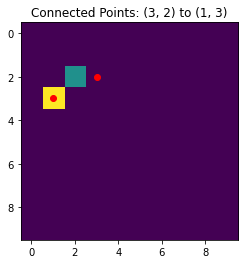

Resulting Matrix with Weights:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
def create_mesh_grid(rows, cols):
    return np.zeros((rows, cols), dtype=float)

def connect_points(matrix, point1, point2):
    x1, y1 = point1
    x2, y2 = point2

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy

    total_distance = 0.0

    while (x1, y1) != (x2, y2):
        matrix[y1, x1] = total_distance  
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy

        total_distance += 1.0 

    matrix[y1, x1] = total_distance  

# create mesh grid
rows, cols = 10, 10
grid_matrix = create_mesh_grid(rows, cols)

# Random
start_point = (np.random.randint(rows), np.random.randint(cols))
end_point = (np.random.randint(rows), np.random.randint(cols))

# Connect points 
connect_points(grid_matrix, start_point, end_point)

# Plot
plt.imshow(grid_matrix, cmap='viridis', origin='upper', interpolation='nearest')
plt.scatter([start_point[0], end_point[0]], [start_point[1], end_point[1]], c='red')  
plt.title(f"Connected Points: {start_point} to {end_point}")
plt.show()

# Resulting matrix 
print("Resulting Matrix with Weights:")
print(grid_matrix)


Problem #2

[87 90 82 69  6 74 61 29 62  2]
[84 52 33 28 24  5 43 79 71 43]
[30  7 91 97  0 72 88 59 32 94]
[79 79 83 68  0 44 90 49  0  7]
[86  4  3 35 70 14 20 94 82 46]
[55 74  8 52  7 21 43  0 19 54]
[55 11 73  6 47 31 41 95 38 96]
[ 6 78 62 95 29 53 80 34 30 71]
[88 64 79 90 78 13  8 94 48 15]
[65  8  1 47 39 73 94 53 48 21]

Ray path for value 79: [79, 88, 90]


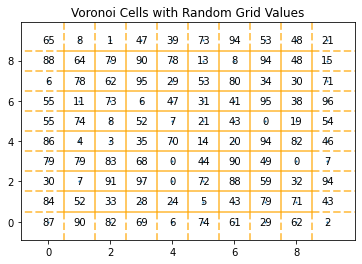

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def generate_random_grid(rows, cols, start_range, end_range):
    total_elements = rows * cols
    if end_range - start_range < total_elements:
        raise ValueError("Error!")

    random_integers = [random.randint(start_range, end_range - 1) for _ in range(total_elements)]
    random_grid = np.array([random_integers[i:i + cols] for i in range(0, total_elements, cols)])

    return random_grid

def get_index(grid, val):
    for i, row in enumerate(grid):
        for j, value in enumerate(row):
            if value == val:
                return i, j

def ray_path(random_grid, val):
    x, y = get_index(random_grid, val)
    path = [val]
    
    for k in range(3):
        A = []
        for i in [-1, 0, 1]:
            for j in [-1, 0, 1]:
                if 0 <= x + i < len(random_grid) and 0 <= y + j < len(random_grid[0]) and (i != 0 or j != 0):
                    if random_grid[x + i][y + j] >= random_grid[x][y]:
                        A.append(random_grid[x + i][y + j])
        
        if not A:
            break
        
        max_neighbor = max(A)
        path.append(max_neighbor)
        x, y = get_index(random_grid, max_neighbor)
    
    return path

def voronoi_cells(random_grid):
    rows, cols = random_grid.shape
    points = np.array([[i, j] for i in range(rows) for j in range(cols)])
    vor = Voronoi(points)
    
    fig, ax = plt.subplots()
    
    # Plot Voronoi cells
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)
    
    # Overlay the random grid values
    for i in range(rows):
        for j in range(cols):
            plt.text(j, i, str(random_grid[i, j]), ha='center', va='center', color='black')

    plt.title('Voronoi Cells with Random Grid Values')
    plt.show()

# Generate random grid
rows = 10
cols = 10
start_range = 0
end_range = 100

random_grid = generate_random_grid(rows, cols, start_range, end_range)

# Print the generated random grid
for row in random_grid:
    print(row)

# Example usage of ray_path
i = random.randint(0, rows - 1)
j = random.randint(0, cols - 1)
target_value = random_grid[i, j]

result_path = ray_path(random_grid, target_value)

print(f"\nRay path for value {target_value}: {result_path}")

# Create and display Voronoi cells
voronoi_cells(random_grid)
